
<h3>A description of the problem to be solved</h3>

Skateboard industry averages $0.5 bln a year and sales are trending upwards (source -https://www.grandviewresearch.com/industry-analysis/skateboard-market). Skateboards alone are a popular and stable product with high demand, not even mentioning goods related to skateboarding industry (clothing, accessories etc). In my report I'm going to cover the problems that a small business owner faces when trying to open a skateboarding shop in a huge city. So the topic of my research is how to succesfully open a skateboarding store in London, with a little help from data analysis. 
In my opinion, there are 3 problems that each new skateshop owner would face:

1) **Where?** One of the toughest questions is choosing the right location. Multiple reports (https://www.researchgate.net/publication/228637298_The_Impact_of_Retail_Location_on_Retailer_Revenues_An_Empirical_Investigation) show the importance of location for success in retail industry. It's important especially in cities like London where rental and housing prices skyrocket. For skateboarding industry this question is of particular importance, as we need to take into account the most frequently visited locations of target audience (skaters)

2) **How?** It is crucial to choose what exactly differentiate us from other businesses - understanding the core value proposition for a brand. Given that there is some competition in market and open data available, it's vital to do a research and understand what people don't / do like about the existing players in a location and what we can bring to a table as a new shop

3) **What?** Chosing the right product mix. Skaters are particularly picky about brands, one of the risks of retail industry is overstocking with the brands that customers aren't willing to buy. So we need to analyze what is a customer demand for skateboarding brands in a given are and make product decision with strong data fundamentals in place

So given that the audience of this report is potential skateboard shop owners, it could be quite beneficial if we could answer those questions with data - this would allow them to avoid costly mistakes and maximize the probability of success. 

<h4>Data selection for the project.</h4>
Now that we have agreed on the problems we'll be solving, let's look at the data available. 


1. Choosing location <br>
Methodology: 
    - 1.1. One particular problem I need to solve - is locating most frequently visited locations by target audience. What are those? Skateparks of course. Once we get the skatepark data, our goal would be to find locations suitable for a new skateshop as close to these parks as possible. 
    - 1.2. To find these locations we'll be looking at existing skateshop locations in each London Borough. The goal we have here is somehow decide - does a particular borough have enough skateshops? To solve this problem we need to use of course one of the classification / regression models. We'll fit the model with the existing skateshop data and make a predictions on number of skateshops per Borough. If a predicted number is greater than current amount of skateshops in a borough - that means there is a demand in a new stores. And the opposite, if there are too many skateshops, we need to avoid those Boroughs
    - 1.3. Having Skatepark and Skateshop Model data in place we'll need to combine this data to find prospective boroughs as close to existing skateparks as possible. It might be considered as a clusterization problem, or can be solved through calculating some type of distances (like Euclidean). However, given that it's a geo data I'd like to solve it through visualization on a map. 

2. Choosing the differentiation against other skateparks.<br>
Methodology:
     - 2.1. Find some open data on customer reviews for all skateparks in london and classify them as bad / good reviews
     - 2.2. Run a simple semantic analysis (world cloud) to understand what makes a good / bad skateshop
  
3. Choosing the product mix for a skatepark.<br>
Methodology:
     - 3.1. Analyze open keyword data on most popular skateboarding brands
     - 3.2. Understand which of this brand keywords are trending by looking into user google searches 



<h2>Finding most frequently visited locations by target audience</h2>
<br>
Data description:
For a problem described in **1.1** I need to look into Foursquare skateparks data in London.
Prerequisites: to make sure that I can use them as Geo Data I need to retrieve the coordinates as well

In [3]:
# importing libraries needed 

import pandas as pd
import json
import numpy as np
import requests
from pandas.io.json import json_normalize
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
import urllib.request
from bs4 import BeautifulSoup


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [4]:
# building a request url for forsquare 

RADIUS=1000
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
near='London'
category='4bf58dd8d48988d167941735'
limit=500
query='skate park'


radius=500
LIMIT=100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&category={}&near={}&query={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    category, 
    near, 
    query,
    limit)

In [5]:
results = requests.get(url).json()


So the data source for 1.1 looks like a data frame with skatepark name and locations

In [6]:
venues = results['response']['groups'][0]['items']  
skatepark_venues = json_normalize(venues) # flatten JSON
skatepark_venues=skatepark_venues[['venue.name','venue.location.lat','venue.location.lng']]
skatepark_venues.head()

,venue.name,venue.location.lat,venue.location.lng
0,House of Vans,51.500678,-0.113944
1,Southbank Skate Park,51.506911,-0.116636
2,Clapham Common Skatepark,51.460802,-0.143462
3,BaySixty6,51.520528,-0.204501
4,Mile End Skate Park,51.517583,-0.031460


<h2>Table 1.2.2. London open demography data with stats for each Borough</h2>
<br>
For a purpose of the table with features I downloaded a file from counsel website containing london census data

In [7]:
london_boroughs=pd.read_csv("/london_boroughs.csv",skiprows=0)
london_boroughs=london_boroughs[1:]
london_boroughs.head(3)

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2016,GLA Household Estimate 2016,Inland Area (Hectares),Population density (per hectare) 2016,"Average Age, 2016","Proportion of population aged 0-15, 2016","Proportion of population of working-age, 2016","Proportion of population aged 65 and over, 2016",Net internal migration (2014),Net international migration (2014),Net natural change (2014),% of resident population born abroad (2014),Largest migrant population by country of birth (2011),% of largest migrant population (2011),Second largest migrant population by country of birth (2011),% of second largest migrant population (2011),Third largest migrant population by country of birth (2011),% of third largest migrant population (2011),% of population from BAME groups (2016),% people aged 3+ whose main language is not English (2011 Census),"Overseas nationals entering the UK (NINo), (2014/15)","New migrant (NINo) rates, (2014/15)",Largest migrant population arrived during 2014/15,Second largest migrant population arrived during 2014/15,Third largest migrant population arrived during 2014/15,Employment rate (%) (2015),Male employment rate (2015),Female employment rate (2015),Unemployment rate (2015),Youth Unemployment (claimant) rate 18-24 (Dec-14),Proportion of 16-18 year olds who are NEET (%) (2014),Proportion of the working-age population who claim out-of-work benefits (%) (Aug-2015),% working-age with a disability (2015),Proportion of working age people with no qualifications (%) 2015,Proportion of working age with degree or equivalent and above (%) 2015,"Gross Annual Pay, (2015)",Gross Annual Pay - Male (2015),Gross Annual Pay - Female (2015),Modelled Household median income estimates 2012/13,% adults that volunteered in past 12 months (2010/11 to 2012/13),Number of jobs by workplace (2014),% of employment that is in public sector (2014),"Jobs Density, 2014","Number of active businesses, 2014",Two-year business survival rates (started in 2012),Crime rates per thousand population 2014/15,Fires per thousand population (2014),Ambulance incidents per hundred population (2014),"Median House Price, 2014","Average Band D Council Tax charge (£), 2015/16",New Homes (net) 2014/15 (provisional),"Homes Owned outright, (2014) %","Being bought with mortgage or loan, (2014) %","Rented from Local Authority or Housing Association, (2014) %","Rented from Private landlord, (2014) %","% of area that is Greenspace, 2005",Total carbon emissions (2013),"Household Waste Recycling Rate, 2014/15","Number of cars, (2011 Census)","Number of cars per household, (2011 Census)","% of adults who cycle at least once per month, 2013/14","Average Public Transport Accessibility score, 2014","Achievement of 5 or more A*- C grades at GCSE or equivalent including English and Maths, 2013/14",Rates of Children Looked After (2015),% of pupils whose first language is not English (2015),% children living in out-of-work households (2014),"Male life expectancy, (2012-14)","Female life expectancy, (2012-14)",Teenage conception rate (2014),Life satisfaction score 2011-14 (out of 10),Worthwhileness score 2011-14 (out of 10),Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2014/15,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
1,E09000001,E09000001,City of London,Inner London,"8,548","5,179",290.4,28.9,42.9,27.2,90.6,9.4,138,252,35,.,United States,2.8,France,2.0,Australia,1.9,27.5,17.1,892,151.0,France,United States,India,64.6,.,.,.,1.2,.,3.8,.,.,.,.,.,.,"£99,390",.,"500,400",3.4,84.60,"19,250",63.0,.,12.3,.,"765,000",943,230,.,.,.,.,4.8,"1,417.5",34.4,"1,692",0.4,.,7.9,78.6,84,.,9.1,.,.,.,6.59,7.08,5.99,5.57,NaN,2.6,128.8,.,.,.,.,.
2,E09

<h3>Table 1.2 - list of all London Boroughs with coordinates</h3>
<br>
For table 1 I'll parse London Boroughs table from wikipedia

In [8]:

# parsing wiki page into html 

fp = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_London_boroughs")
mybytes = fp.read()

mystr = mybytes.decode("utf8")
fp.close()

# parsing html into BS soup object

soup = BeautifulSoup(mystr, 'html.parser')


In [9]:
# creting lists for each of the parsed table rows

table = soup.find('table', attrs={'class':'wikitable'})
table_rows = table.find_all('tr')
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.replace('\n','') for tr in td]
    l.append(row)


In [10]:
# creting header columns for each of the table headers

col_rows=table.find_all('th')

cols=[]
for th in col_rows:
    row=th.text.replace('\n','')
    cols.append(row)


In [11]:
# building a dataframe

df=pd.DataFrame(l, columns=cols)
df = df.iloc[1:]


This Dataframe will be the main one to retrieve data for geo location

In [12]:
# doing some optimization of the column string content
df['Borough']=df['Borough'].str.replace(" [note]",'')
l=[]
for x in df['Borough']:
    x=x.replace(" [note]","")
    x=x.replace(" [note 1]","")
    x=x.replace(" [note 4]","")
    l.append(x)
df['Borough']=l


In [13]:
# converting coordinates to numeric format

lattitude=[]
longitude=[]
for x in df['Co-ordinates']:
    z=x.index('51.') 
    z1=x.index('0.')
    if x.find('W'):
        long=0-float(x[z1:z1+6])
    else:
        long=float(x[z1:z1+6])
    lat=float(x[z:z+7])
    lattitude.append(lat)
    
    longitude.append(long)

The final dataframe with London Boroughs look like this

In [14]:
df['Longitude']=longitude
df['Lattitude']=lattitude
df.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Longitude,Lattitude
1,Barking and Dagenham,,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25,-0.1557,51.5607
2,Barnet,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31,-0.1517,51.6252
3,Bexley,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23,-0.1505,51.4549
4,Brent,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12,-0.2817,51.5588
5,Bromley,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20,-0.0198,51.4039


Next we need to understand what is current competition - where are the existing skateshop placed. For that I've downloaded locations of the most popular skateparks on google maps, another way is to get by Foursquare API request

In [15]:
# data on existing skateshop addresses(from google maps)
df_skateshop=pd.read_csv('/skateshops2.csv')
df_skateshop.columns=['postal code','name','borough']
df_skateshop.head(3)

,postal code,name,borough
0,WC2H 9EE,West London,Camden
1,SW9 9TQ,Brixton's Baddest Skate shop,Lambeth
2,NW1 9EE,Three Amigos Skateboard Shop,Camden


Let's break group this data to see how many skateshops each Borough has

In [16]:
df_skateshop_grouped=df_skateshop.groupby(by=['borough'],as_index=False).count()
df_skateshop_grouped=df_skateshop_grouped.drop(['postal code'], axis=1)
df_skateshop_grouped.columns=['borough','cnt_shops']
df_skateshop_grouped.head()

,borough,cnt_shops
0,Brent,1
1,Camden,4
2,Enfield,1
3,Hackney,2
4,Haringey,1


Let's merge it with our census data. This table will be used for modeling

In [17]:
final_df=pd.merge(london_boroughs,df_skateshop_grouped, how='left',left_on='Area name', right_on='borough').drop(['borough'],axis=1)
final_df['cnt_shops']=final_df['cnt_shops'].replace(np.nan,0)
final_df.head()

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2016,GLA Household Estimate 2016,Inland Area (Hectares),Population density (per hectare) 2016,"Average Age, 2016","Proportion of population aged 0-15, 2016","Proportion of population of working-age, 2016","Proportion of population aged 65 and over, 2016",Net internal migration (2014),Net international migration (2014),Net natural change (2014),% of resident population born abroad (2014),Largest migrant population by country of birth (2011),% of largest migrant population (2011),Second largest migrant population by country of birth (2011),% of second largest migrant population (2011),Third largest migrant population by country of birth (2011),% of third largest migrant population (2011),% of population from BAME groups (2016),% people aged 3+ whose main language is not English (2011 Census),"Overseas nationals entering the UK (NINo), (2014/15)","New migrant (NINo) rates, (2014/15)",Largest migrant population arrived during 2014/15,Second largest migrant population arrived during 2014/15,Third largest migrant population arrived during 2014/15,Employment rate (%) (2015),Male employment rate (2015),Female employment rate (2015),Unemployment rate (2015),Youth Unemployment (claimant) rate 18-24 (Dec-14),Proportion of 16-18 year olds who are NEET (%) (2014),Proportion of the working-age population who claim out-of-work benefits (%) (Aug-2015),% working-age with a disability (2015),Proportion of working age people with no qualifications (%) 2015,Proportion of working age with degree or equivalent and above (%) 2015,"Gross Annual Pay, (2015)",Gross Annual Pay - Male (2015),Gross Annual Pay - Female (2015),Modelled Household median income estimates 2012/13,% adults that volunteered in past 12 months (2010/11 to 2012/13),Number of jobs by workplace (2014),% of employment that is in public sector (2014),"Jobs Density, 2014","Number of active businesses, 2014",Two-year business survival rates (started in 2012),Crime rates per thousand population 2014/15,Fires per thousand population (2014),Ambulance incidents per hundred population (2014),"Median House Price, 2014","Average Band D Council Tax charge (£), 2015/16",New Homes (net) 2014/15 (provisional),"Homes Owned outright, (2014) %","Being bought with mortgage or loan, (2014) %","Rented from Local Authority or Housing Association, (2014) %","Rented from Private landlord, (2014) %","% of area that is Greenspace, 2005",Total carbon emissions (2013),"Household Waste Recycling Rate, 2014/15","Number of cars, (2011 Census)","Number of cars per household, (2011 Census)","% of adults who cycle at least once per month, 2013/14","Average Public Transport Accessibility score, 2014","Achievement of 5 or more A*- C grades at GCSE or equivalent including English and Maths, 2013/14",Rates of Children Looked After (2015),% of pupils whose first language is not English (2015),% children living in out-of-work households (2014),"Male life expectancy, (2012-14)","Female life expectancy, (2012-14)",Teenage conception rate (2014),Life satisfaction score 2011-14 (out of 10),Worthwhileness score 2011-14 (out of 10),Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2014/15,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections,cnt_shops
0,E09000001,E09000001,City of London,Inner London,"8,548","5,179",290.4,28.9,42.9,27.2,90.6,9.4,138,252,35,.,United States,2.8,France,2.0,Australia,1.9,27.5,17.1,892,151.0,France,United States,India,64.6,.,.,.,1.2,.,3.8,.,.,.,.,.,.,"£99,390",.,"500,400",3.4,84.60,"19,250",63.0,.,12.3,.,"765,000",943,230,.,.,.,.,4.8,"1,417.5",34.4,"1,692",0.4,.,7.9,78.6,84,.,9.1,.,.,.,6.59,7.08,5.99,5.57,NaN,2.6,128.8,.,.,.

<H3>Data Cleaning</H3>

the problem we have is that a lot of fields are of the Object types

In [18]:
final_df.head(2)

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2016,GLA Household Estimate 2016,Inland Area (Hectares),Population density (per hectare) 2016,"Average Age, 2016","Proportion of population aged 0-15, 2016","Proportion of population of working-age, 2016","Proportion of population aged 65 and over, 2016",Net internal migration (2014),Net international migration (2014),Net natural change (2014),% of resident population born abroad (2014),Largest migrant population by country of birth (2011),% of largest migrant population (2011),Second largest migrant population by country of birth (2011),% of second largest migrant population (2011),Third largest migrant population by country of birth (2011),% of third largest migrant population (2011),% of population from BAME groups (2016),% people aged 3+ whose main language is not English (2011 Census),"Overseas nationals entering the UK (NINo), (2014/15)","New migrant (NINo) rates, (2014/15)",Largest migrant population arrived during 2014/15,Second largest migrant population arrived during 2014/15,Third largest migrant population arrived during 2014/15,Employment rate (%) (2015),Male employment rate (2015),Female employment rate (2015),Unemployment rate (2015),Youth Unemployment (claimant) rate 18-24 (Dec-14),Proportion of 16-18 year olds who are NEET (%) (2014),Proportion of the working-age population who claim out-of-work benefits (%) (Aug-2015),% working-age with a disability (2015),Proportion of working age people with no qualifications (%) 2015,Proportion of working age with degree or equivalent and above (%) 2015,"Gross Annual Pay, (2015)",Gross Annual Pay - Male (2015),Gross Annual Pay - Female (2015),Modelled Household median income estimates 2012/13,% adults that volunteered in past 12 months (2010/11 to 2012/13),Number of jobs by workplace (2014),% of employment that is in public sector (2014),"Jobs Density, 2014","Number of active businesses, 2014",Two-year business survival rates (started in 2012),Crime rates per thousand population 2014/15,Fires per thousand population (2014),Ambulance incidents per hundred population (2014),"Median House Price, 2014","Average Band D Council Tax charge (£), 2015/16",New Homes (net) 2014/15 (provisional),"Homes Owned outright, (2014) %","Being bought with mortgage or loan, (2014) %","Rented from Local Authority or Housing Association, (2014) %","Rented from Private landlord, (2014) %","% of area that is Greenspace, 2005",Total carbon emissions (2013),"Household Waste Recycling Rate, 2014/15","Number of cars, (2011 Census)","Number of cars per household, (2011 Census)","% of adults who cycle at least once per month, 2013/14","Average Public Transport Accessibility score, 2014","Achievement of 5 or more A*- C grades at GCSE or equivalent including English and Maths, 2013/14",Rates of Children Looked After (2015),% of pupils whose first language is not English (2015),% children living in out-of-work households (2014),"Male life expectancy, (2012-14)","Female life expectancy, (2012-14)",Teenage conception rate (2014),Life satisfaction score 2011-14 (out of 10),Worthwhileness score 2011-14 (out of 10),Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2014/15,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections,cnt_shops
0,E09000001,E09000001,City of London,Inner London,"8,548","5,179",290.4,28.9,42.9,27.2,90.6,9.4,138,252,35,.,United States,2.8,France,2.0,Australia,1.9,27.5,17.1,892,151.0,France,United States,India,64.6,.,.,.,1.2,.,3.8,.,.,.,.,.,.,"£99,390",.,"500,400",3.4,84.60,"19,250",63.0,.,12.3,.,"765,000",943,230,.,.,.,.,4.8,"1,417.5",34.4,"1,692",0.4,.,7.9,78.6,84,.,9.1,.,.,.,6.59,7.08,5.99,5.57,NaN,2.6,128.8,.,.,.

In [19]:
coll=['GLA Population Estimate 2016','GLA Household Estimate 2016','Inland Area (Hectares)','Population density (per hectare) 2016',\
     'Net internal migration (2014)','Net international migration (2014)','Net natural change (2014)','% of resident population born abroad (2014)',\
     '% of resident population born abroad (2014)','% of largest migrant population (2011)','% of second largest migrant population (2011)',\
     '% people aged 3+ whose main language is not English (2011 Census)','Largest migrant population arrived during 2014/15',\
     'Youth Unemployment (claimant) rate 18-24 (Dec-14)','% adults that volunteered in past 12 months (2010/11 to 2012/13)',\
     'Gross Annual Pay, (2015)','Median House Price, 2014','% of area that is Greenspace, 2005','Achievement of 5 or more A*- C grades at GCSE or equivalent including English and Maths, 2013/14','Average Public Transport Accessibility score, 2014']


Lets convert them to numerical fields

In [34]:
for x in coll[14:100]:
    final_df[x]=final_df[x].str.replace(',','')
    final_df[x]=final_df[x].str.replace(' ','')
    final_df[x]=final_df[x].str.replace('.','')
    final_df[x]=final_df[x].str.replace('%','')
    final_df[x]=final_df[x].str.replace('£','')
    final_df[x]=pd.to_numeric(final_df[x])

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

As some of the columns still contain NaN values we'll do some additional data cleaning

In [37]:
arr=final_df[['Median House Price, 2014','Employment rate (%) (2015)', 'Number of cars per household, (2011 Census)', \
                         'Average Public Transport Accessibility score, 2014','Population density (per hectare) 2016', \
                         'Jobs Density, 2014','% of resident population born abroad (2014)']]
arr.isnull().any()

Median House Price, 2014                              False
Employment rate (%) (2015)                            False
Number of cars per household, (2011 Census)           False
Average Public Transport Accessibility score, 2014     True
Population density (per hectare) 2016                  True
Jobs Density, 2014                                    False
% of resident population born abroad (2014)            True
dtype: bool

In [38]:
arr['Average Public Transport Accessibility score, 2014']=arr['Average Public Transport Accessibility score, 2014'].replace(np.nan,arr['Average Public Transport Accessibility score, 2014'].mean())
arr['Population density (per hectare) 2016']=arr['Population density (per hectare) 2016'].replace(np.nan,arr['Population density (per hectare) 2016'].mean())
arr['% of resident population born abroad (2014)']=arr['% of resident population born abroad (2014)'].replace(np.nan,arr['% of resident population born abroad (2014)'].mean())


/Users/olegmonahov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/olegmonahov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/olegmonahov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [39]:
arr.isnull().any()

Median House Price, 2014                              False
Employment rate (%) (2015)                            False
Number of cars per household, (2011 Census)           False
Average Public Transport Accessibility score, 2014    False
Population density (per hectare) 2016                 False
Jobs Density, 2014                                    False
% of resident population born abroad (2014)           False
dtype: bool

<h2>Modelling the best location for a skateshop</h2> <br>
<p>So now we'd like to predict which borough is good for a skateshop. As we have skateshop numbers for each borough , we can use them for a prediction. As this is a regression task where we need to predict probability of having a skateshop in area we'd want to run a multinomial regression on a test dataset and then if accuracy is good, on the entire dataset. Then we 'll look into predicted values and compare with the actual Number of skateshops in location</p>

Building the test and train sets

In [40]:
X = np.asarray(arr)

X[0:5]
y = np.asarray(final_df['cnt_shops'])
y [0:5]

array([0., 0., 0., 0., 1.])


Fitting the regression model on a test data

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
yhat
yhat_prob = LR.predict_proba(X_test)
yhat_prob

Train set: (31, 7) (31,)
Test set: (8, 7) (8,)


/Users/olegmonahov/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


array([[7.78447123e-01, 2.20719844e-01, 1.80256467e-15, 8.33033806e-04],
       [9.63772858e-01, 3.54672565e-02, 2.04157560e-10, 7.59885428e-04],
       [3.81636583e-01, 5.74470580e-01, 2.22273354e-06, 4.38906142e-02],
       [7.81670781e-01, 2.03144020e-01, 8.77481679e-04, 1.43077180e-02],
       [8.82114421e-01, 1.16578680e-01, 6.92103466e-12, 1.30689880e-03],
       [6.28173493e-01, 2.67004428e-01, 4.85479596e-04, 1.04336600e-01],
       [5.54859562e-01, 4.23072111e-01, 9.69483119e-07, 2.20673578e-02],
       [9.18060918e-01, 8.05578081e-02, 1.64337294e-09, 1.38127236e-03]])

Checking if a jaccard index is good. 1 is ideal

In [42]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.75

Running prediction on an entire set

In [43]:
yhat_prob = LR.predict_proba(X)
probability_class_1 = yhat_prob[:, 0]
probability_class_1

array([9.84910309e-01, 8.50202290e-01, 8.95056322e-01, 9.52357340e-01,
       7.78447123e-01, 9.49313443e-01, 2.63636103e-01, 9.18060918e-01,
       8.84528714e-01, 9.22154071e-01, 8.65628890e-01, 3.81636583e-01,
       6.28173493e-01, 6.58961551e-01, 9.32115069e-01, 9.64555237e-01,
       9.63772858e-01, 9.27351927e-01, 2.47429090e-01, 1.13952345e-04,
       9.35465512e-01, 5.76277828e-01, 7.75723359e-01, 9.21721655e-01,
       6.40335129e-01, 8.82114421e-01, 9.28149961e-01, 5.54859562e-01,
       9.50201542e-01, 3.80504212e-01, 8.38254614e-01, 7.61517699e-01,
       1.01030223e-01, 5.23073690e-01, 9.24725417e-01, 8.31275412e-01,
       7.83241959e-01, 7.76063538e-01, 7.81670781e-01])

Creating a new dataset for predictive values

In [44]:
df_prob_skatepark=final_df[['Area name']]
df_prob_skatepark['probability']=probability_class_1


/Users/olegmonahov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Merging a new dataset with skateshop location dataframe for comparison

In [45]:
df_prob_skatepark.sort_values(by='probability', ascending=False)
df_skate=pd.merge(df_prob_skatepark,df_skateshop_grouped, how='left',left_on='Area name', right_on='borough')

In [46]:
df_skate.sort_values(by='probability', ascending=True).head(10)

,Area name,probability,borough,cnt_shops
19,Kensington and Chelsea,0.000114,Kensington and Chelsea,3.0
32,Westminster,0.101030,Westminster,1.0
18,Islington,0.247429,NaN,NaN
6,Camden,0.263636,Camden,4.0
29,Tower Hamlets,0.380504,Tower Hamlets,1.0
11,Hackney,0.381637,Hackney,2.0
33,Inner London,0.523074,NaN,NaN
27,Southwark,0.554860,NaN,NaN
21,Lambeth,0.576278,Lambeth,1.0
12,Hammersmith and Fulham,0.628173,NaN,NaN


So now we see that some boroughs got a good predictive score, but no skateshops. Let's filter them out in a separate resulting dataframe which would be the list of the most prospetive boroughs for skateshops

In [47]:
df_filtered=df_skate.sort_values(by='probability', ascending=True).head(12)[df_skate['cnt_shops'].isnull()==True]
df_filtered.head()

/Users/olegmonahov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Area name,probability,borough,cnt_shops
18,Islington,0.247429,NaN,NaN
33,Inner London,0.523074,NaN,NaN
27,Southwark,0.554860,NaN,NaN
12,Hammersmith and Fulham,0.628173,NaN,NaN
24,Newham,0.640335,NaN,NaN


In [64]:
filter_park=[]
for x in df_filtered['Area name']:
    filter_park.append(x)

df_skaters_filtered=df[df['Borough'].isin(filter_park)]
df_skaters_filtered.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Longitude,Lattitude
12,Hammersmith and Fulham,Y,,Hammersmith and Fulham London Borough Council,Labour,"Town Hall, King Street",6.33,"178,685",51°29′34″N 0°14′02″W﻿ / ﻿51.4927°N 0.2339°W﻿ /...,4,-0.2339,51.4927
18,Islington,Y,,Islington London Borough Council,Labour,"Customer Centre, 222 Upper Street",5.74,"215,667",51°32′30″N 0°06′08″W﻿ / ﻿51.5416°N 0.1022°W﻿ /...,10,-0.1022,51.5416
24,Newham,[note 3],,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,"318,227",51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E﻿ /...,27,-0.0469,51.5077
27,Southwark,Y,,Southwark London Borough Council,Labour,160 Tooley Street,11.14,"298,464",51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W﻿ /...,7,-0.0804,51.5035


In [65]:
# some london coordinates to build folium on
latitude=51.500678
longitude=0.113944

In [66]:
skatepark_venues.head()

,venue.name,venue.location.lat,venue.location.lng
0,House of Vans,51.500678,-0.113944
1,Southbank Skate Park,51.506911,-0.116636
2,Clapham Common Skatepark,51.460802,-0.143462
3,BaySixty6,51.520528,-0.204501
4,Mile End Skate Park,51.517583,-0.031460


In [68]:
# create map of London using latitude and longitude values
import folium
map_london_parks = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(df_skaters_filtered['Lattitude'], df_skaters_filtered['Longitude'], df_skaters_filtered['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_parks)  

for lat, lng, label in zip(skatepark_venues['venue.location.lat'], skatepark_venues['venue.location.lng'], skatepark_venues['venue.name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_parks)  

    
    
map_london_parks

<h2> Part 2. Choosing the differentiation against other skateshops.</h2> <br>

Methodology:
     - 2.1. Find some open data on customer reviews for all skateparks in london and classify them as bad / good reviews
     - 2.2. Run a simple semantic analysis (world cloud) to understand what makes a good / bad skateshop
  

<p>For a purpose of this task I just downloaded the data of skateboarding shop reivews from google maps and stored it in csv</p>

In [545]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [538]:
# here is an example on how to pull data from foursquare venues tips.
# however the api has limitation for just one tip per venue
# so we'll be using google maps reviews instead


# tips='https://api.foursquare.com/v2/venues/53e41c3d498eaa1264f9f77e/tips'

# params=dict(client_id=CLIENT_ID,client_secret=CLIENT_SECRET,v='20180605')

# resp_tips=requests.get(url=tips, params=params)

# data_tips=json.loads(resp_tips.text)

# data_tips

df=pd.read_csv('/Skateshop.csv')
df.head()

,Mark,Review
0,4,"The staff were friendly and very helpful, and ..."
1,4,My only advice is to check the website before ...
2,3,"The guy who assisted me was very nice, patient..."
3,5,Super helpful and super nice guys. Got a custo...
4,2,Went into the store yesterday. Arrogant and un...


In [539]:
# clustering good and bad reviews

good_reviews=df[df['Mark']>3]['Review']
bad_reviews=df[df['Mark']<=3]['Review']

Building the cloud for good reviews

In [540]:
comment_words = '' 

for val in good_reviews: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

Building the cloud for bad reviews

In [541]:
comment_words_bad = '' 

for val in bad_reviews: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words_bad += " ".join(tokens)+" "

In [542]:
stopwords = set(STOPWORDS)
# instantiate a word cloud object
comment_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
extra_stopwords = ['shop', 'super', 'shop','store', 'good', 'skate','skater','skateboarding','went','great','best','skateboard','london']
querywords = comment_words.split()

resultwords  = [word for word in querywords if word.lower() not in extra_stopwords]
result = ' '.join(resultwords)

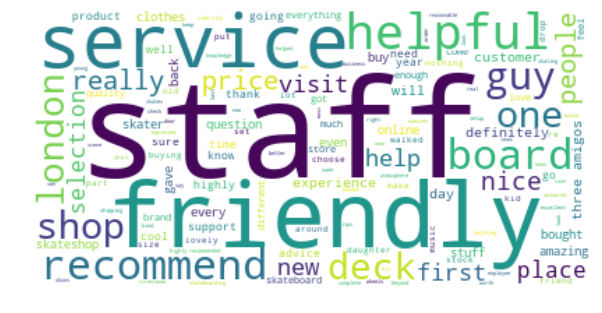

In [551]:
comment_wc.generate(result)
plt.figure(figsize=(10,10))
plt.imshow(comment_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [553]:
extra_stopwords = ['shop', 'super', 'shop','nice','one','making','even','shop','store', 'good', 'skate','skater','skateboarding','went','great','best','skateboard','london']
querywords = comment_words_bad.split()

resultwords  = [word for word in querywords if word.lower() not in extra_stopwords]
result = ' '.join(resultwords)

comment_wc=comment_wc.generate(result)

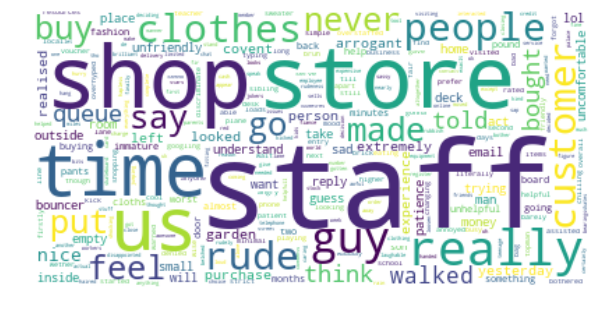

In [554]:
plt.figure(figsize=(10,10))

plt.imshow(comment_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<h2>Choosing the product mix for a skatepark.</h2>
Methodology:

3.1. Analyze open keyword data on most popular skateboarding brands
3.2. Understand which of this brand keywords are trending by looking into user google searches

<h3>Keyword data on most popular skateboarding brands</h3>
<p>For a purpose of this task parsed the list of popular skate brands</p>

In [558]:
# parsing stuff https://www.skatedeluxe.com/en/all-brands
import json
import urllib.request
from bs4 import BeautifulSoup


# parsing wiki page into html 

fp = urllib.request.urlopen("https://www.skatedeluxe.com/en/all-brands")
mybytes = fp.read()

mystr = mybytes.decode("utf8")
fp.close()

In [559]:
soup = BeautifulSoup(mystr, 'html.parser')

table = soup.find('div', attrs={'class':'header-menu-brands-list'})


In [560]:
# creting lists for each of the parsed table rows
l=[]
table = soup.find('div', attrs={'class':'header-menu-brands-list'})
table_rows = table.find_all('a', attrs={'class':'header-menu-brand'})
for tr in table_rows:
    td = tr.get('title')
    td=td.replace(' Shop','')
    l.append(td)


Then we can user Google ads keyword planner API to get results on which of them have most of traffic 

In [ ]:

# keywords = [
#     {'text': 'mars cruise', 'matchType': 'BROAD'},
#     {'text': 'cheap cruise', 'matchType': 'PHRASE'},
#     {'text': 'cruise', 'matchType': 'EXACT'}
# ]
# negative_keywords = [
#     {'text': 'moon walk', 'matchType': 'BROAD'}
# ]
# keyword_estimate_requests = []
# for keyword in keywords:
#   keyword_estimate_requests.append({
#       'keyword': {
#           'xsi_type': 'Keyword',
#           'matchType': keyword['matchType'],
#           'text': keyword['text']
#       }
#   })


Let's plot the list of most popular Skateboard Brands

In [562]:
df_search_terms=pd.read_csv('/skateboarding_terms.csv')
df_search_terms[df_search_terms['Estimated Clicks']>20].sort_values(by=['Estimated Clicks'], ascending=False)

,Keyword,Estimated Clicks,Estimated Impressions
0,'adidas',72636.59,667641.75
37,'Vans',31078.82,323190.94
8,'Converse',20961.03,231728.86
26,'Patagonia',6477.31,86360.36
41,Levi's,6156.45,60637.17
35,'The North Face',3721.78,26449.65
10,'Dickies',2261.33,18827.35
5,'Carhartt WIP',1641.23,10737.26
36,'Thrasher',1602.50,8601.91
23,'Nike SB',1497.80,27396.24
